### Plot distibution of editc values

In [2]:
%matplotlib inline
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd
import numpy as np
import os
import pybedtools
from scipy.spatial import distance
import warnings
from collections import defaultdict
warnings.simplefilter(action='ignore', category=FutureWarning)
from tqdm import tnrange, tqdm_notebook
import multiprocessing
pd.set_option('display.max_colwidth', 500)
from scipy.special import betainc

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/14_reproducibility/outputs/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/14_reproducibility/outputs/'

In [3]:
sample19_file = os.path.join(input_dir, 'Sample19_S17_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows_51.txt.inclApo1000.e0.001.conf0.99.bed')
sample20_file = os.path.join(input_dir, 'Sample20_S18_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows_51.txt.inclApo1000.e0.001.conf0.99.bed')
sample27_file = os.path.join(input_dir, 'Sample27_S37_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows_51.txt.inclApo1000.e0.001.conf0.99.bed')
sample28_file = os.path.join(input_dir, 'Sample28_S21_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows_51.txt.inclApo1000.e0.001.conf0.99.bed')

eclip_rep1_file = '/oasis/tscc/scratch/bay001/idr_test/GSM2071742_IGF2BP1_H9ES_Rep1_eCLIP.InputNormalizedPeaks.bed.filtered.bed'
eclip_rep2_file = '/oasis/tscc/scratch/bay001/idr_test/GSM2071745_IGF2BP1_H9ES_Rep2_eCLIP.InputNormalizedPeaks.bed.filtered.bed'

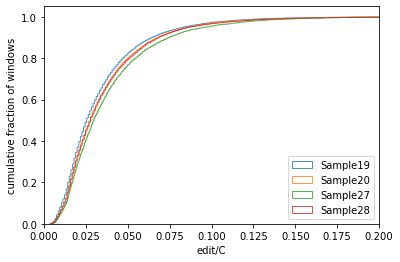

In [4]:
bed = ['chrom','start','end','name','score','strand']
sample19 = pd.read_csv(sample19_file, sep='\t', names=bed)
sample20 = pd.read_csv(sample20_file, sep='\t', names=bed)
sample27 = pd.read_csv(sample27_file, sep='\t', names=bed)
sample28 = pd.read_csv(sample28_file, sep='\t', names=bed)
eclip_rep1 = pd.read_csv(eclip_rep1_file, sep='\t', names=bed)
eclip_rep2 = pd.read_csv(eclip_rep2_file, sep='\t', names=bed)

fig, ax = plt.subplots()
for x, label in zip([sample19, sample20, sample27, sample28], ['Sample19','Sample20','Sample27','Sample28']):
    ax.hist(
    x['score'], bins=1000, density=True, cumulative=True,
    histtype='step', alpha=0.8, label=label
)
ax.set_xlim(0, 0.2)
ax.set_xlabel('edit/C')
ax.set_ylabel('cumulative fraction of windows')
plt.legend(loc='lower right')

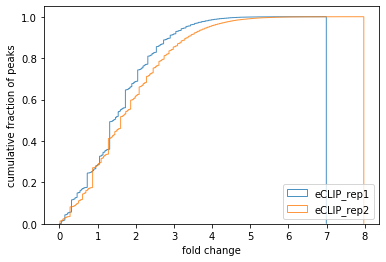

In [5]:
fig, ax = plt.subplots()
for x, label in zip([eclip_rep1, eclip_rep2], ['eCLIP_rep1','eCLIP_rep2']):
    ax.hist(
    x['score'], bins=1000, density=True, cumulative=True,
    histtype='step', alpha=0.8, label=label
)
# ax.set_xlim(0, 0.2)
ax.set_xlabel('fold change')
ax.set_ylabel('cumulative fraction of peaks')
plt.legend(loc='lower right')

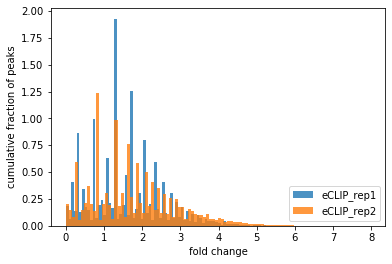

In [6]:
fig, ax = plt.subplots()
for x, label in zip([eclip_rep1, eclip_rep2], ['eCLIP_rep1','eCLIP_rep2']):
    ax.hist(
    x['score'], bins=100, density=True, alpha=0.8, label=label
)
# ax.set_xlim(0, 0.2)
ax.set_xlabel('fold change')
ax.set_ylabel('cumulative fraction of peaks')
plt.legend(loc='lower right')

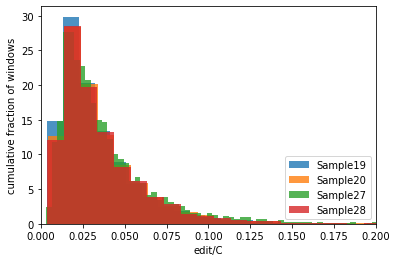

In [7]:
bed = ['chrom','start','end','name','score','strand']
sample19 = pd.read_csv(sample19_file, sep='\t', names=bed)
sample20 = pd.read_csv(sample20_file, sep='\t', names=bed)
sample27 = pd.read_csv(sample27_file, sep='\t', names=bed)
sample28 = pd.read_csv(sample28_file, sep='\t', names=bed)
eclip_rep1 = pd.read_csv(eclip_rep1_file, sep='\t', names=bed)
eclip_rep2 = pd.read_csv(eclip_rep2_file, sep='\t', names=bed)

fig, ax = plt.subplots()
for x, label in zip([sample19, sample20, sample27, sample28], ['Sample19','Sample20','Sample27','Sample28']):
    ax.hist(
    x['score'], bins=100, density=True, alpha=0.8, label=label
)
ax.set_xlim(0, 0.2)
ax.set_xlabel('edit/C')
ax.set_ylabel('cumulative fraction of windows')
plt.legend(loc='lower right')